# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

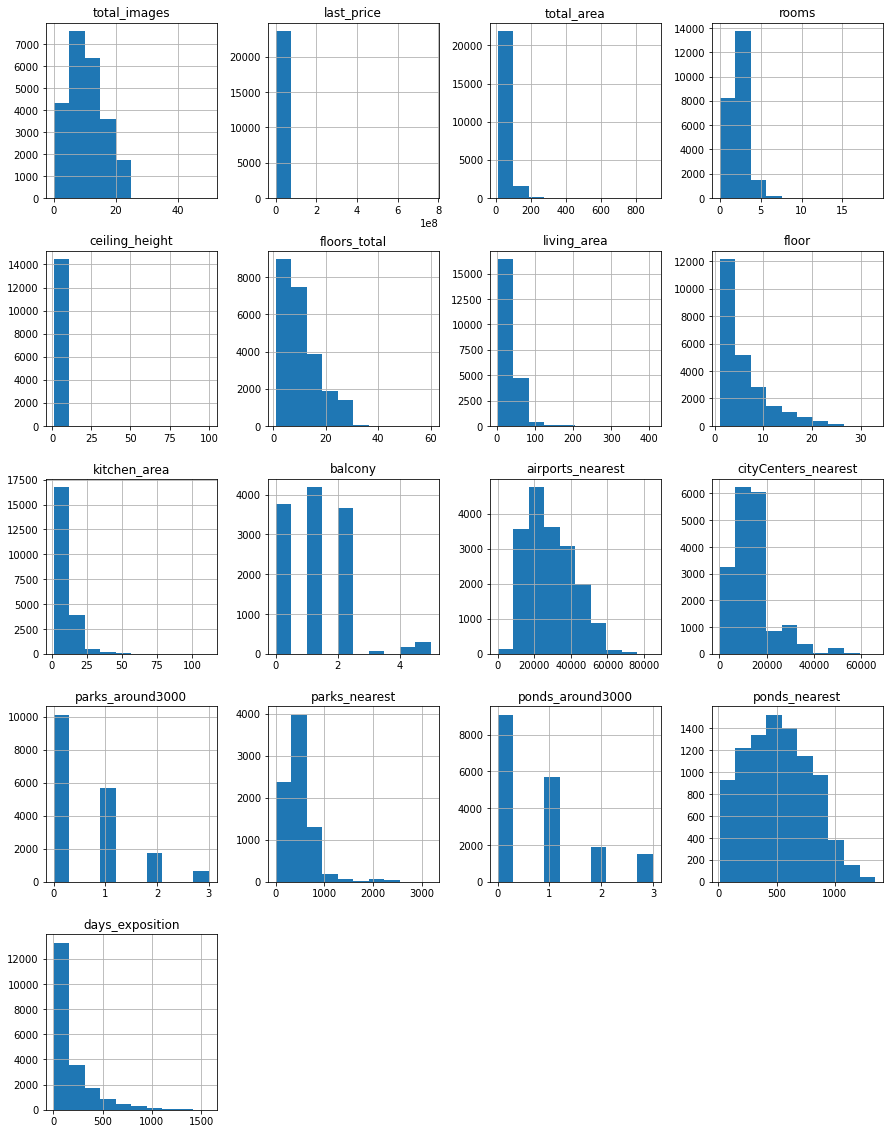

In [4]:
data.hist(figsize = (15, 20));

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Предобработка данных

####  Поиск и изучение пропущенных значения в столбцах

Всего в датасете 23699 строки. Есть проблема с пропущенными значениями и есть столбцы с неправильным типом данных. Cтолбцы с пропусками данных: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony,locality_name
Например как минимум необходимо перевести last_price в целочисленный тип. Так же необходимо перевести first_day_exposition в тип datetime и тд. Есть аномальные значия такие как 19 комнатная квартира, и потолки 100м

In [6]:
#Заменим пропуски balcony на  0 и переведем в целочисленный тип
data['balcony'] = data['balcony'].fillna(value=0).astype(int)
#Заполним пропуски is_apartment и преобразуем в bool
data['is_apartment'] = data['is_apartment'].fillna(value=False).astype(bool)
#Удаляем записи, где отсутствует этажность и перобразуем  в int
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'] = data['floors_total'].astype(int)
#переимнуем столбец cityCenters_nearest в citycenters_nearest
data.rename(columns = {'cityCenters_nearest':'citycenters_nearest'}, inplace=True)

Возможные причины пропусков данных is_apartment неправильный тип данных при заполнении

#### 


In [7]:
#Преобразуем last_price и в целочисленный тип
data['last_price'] = data['last_price'].astype(int)
# Преобразуем first_day_exposition в тип datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

data['living_area'] = data['living_area'].where(data['living_area']>data['kitchen_area'])
data['living_area'].fillna(data['living_area'].median(), inplace=True)
data['kitchen_area'] = data['kitchen_area'].where(data['living_area']>data['kitchen_area'])
data['kitchen_area'].fillna(data['kitchen_area'].median(), inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int64         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony         

#### поиск и исправление неявных дубликатов

In [9]:
# Перведем значения столбца locality_name
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

cut_words = ['городской поселок ', 'деревня ', 'коттеджный поселок ', 'поселок ', 'садоводческое некоммерческое товарищество ', 'садовое товарищество ', 'село ', 'городского типа ', 'пансионат ', 'при железнодорожной станции ', 'платформа ', 'форт '] 
for word in cut_words: 
    data['locality_name'] = data['locality_name'].str.replace(word, '')

data.dropna(subset=['locality_name'], inplace=True)

In [10]:
data['ceiling_height'] = data['ceiling_height'
                             ].where(data['ceiling_height'
                                         ]< 4, other = data['ceiling_height'].div(10) )
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

In [11]:
data['ceiling_height'].describe()

count    23565.000000
mean         2.682797
std          0.246221
min          0.400000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

In [12]:
ceiling_height_anomaly = data.query('ceiling_height >= 4 or ceiling_height <= 2').pivot_table(index = 'ceiling_height',
                            values = ['total_area','last_price','rooms','is_apartment', 'studio'])

ceiling_height_anomaly.shape[0]/data.shape[0]

0.001400381922342457

In [13]:
ceiling_height_anomaly.count()

is_apartment    33
last_price      33
rooms           33
studio          33
total_area      33
dtype: int64

Всего 33 значений в данных с выбросами по высоте потолка. Это 0.14% от всей выборки - думаю от этих данных можно смело избавится

In [14]:
data['ceiling_height']= data.query('ceiling_height > 2 and ceiling_height <= 4')['ceiling_height']
data.dropna(subset=['ceiling_height'], inplace=True)

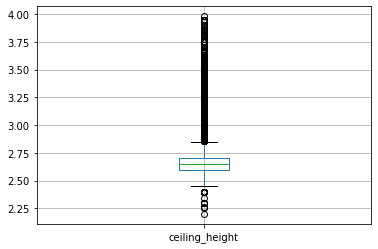

In [15]:
data.boxplot(column='ceiling_height');

In [17]:
#проверим столбец с общей площадью
total_area_anomaly = data.query('total_area >= 200')['total_area']
total_area_anomaly.count()

211

In [18]:
total_area_anomaly.shape[0]/data.shape[0]

0.00899441578924933

еще 211 значений, еще 0.9 процента - думаю тоже можно избавится этих данных

In [19]:
data['total_area'] = data.query('total_area <= 200')['total_area']
data.dropna(subset=['total_area'], inplace=True)

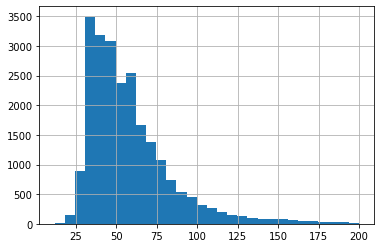

In [20]:
data['total_area'].hist(bins=30);

### Посчитайте и добавьте в таблицу новые столбцы

In [21]:
# Добавим столбец цены 1 квадратного метра
data['m2_price'] = (data['last_price']/data['total_area']).astype(int)

#Добавим столбец день недели публикации объявления
data['week_day_exposition'] = data['first_day_exposition'].apply(lambda x: x.isoweekday())
dict_of_weekdays = {1: 'понедельник', 2: 'вторник', 3: 'среда', 4: 'четверг', 
                    5: 'пятница', 6: 'суббота', 7: 'воскресенье'}

data['week_day_exposition'] = data['week_day_exposition'].map(dict_of_weekdays)
# Добавим столбец месяц публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month
# Добавим столбец год публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year


# категоризуем тип эатажа квартиры
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
# запишем категори  в столбец
data['floor_category'] = data.apply(floor_category, axis = 1)
#Переведем расстояние до центра города в километры
data['citycenters_nearest_km'] = (data['citycenters_nearest']/1000)
data['citycenters_nearest_km'] = data['citycenters_nearest_km'].fillna(999999).astype('int')


In [22]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2_price,week_day_exposition,month_exposition,year_exposition,floor_category,citycenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.000,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370,четверг,3,2019,другой,16
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.000,2,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,вторник,12,2018,первый,18
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.300,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,четверг,8,2015,другой,13
3,0,64900000,159.00,2015-07-24,3,2.65,14,30.40,9,False,False,False,9.045,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176,пятница,7,2015,другой,6
4,2,10000000,100.00,2018-06-19,2,3.03,14,30.40,13,False,False,False,9.045,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,вторник,6,2018,другой,8
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.100,0,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065,понедельник,9,2018,другой,999999
6,6,3700000,37.30,2017-11-02,1,2.65,26,30.40,6,False,False,False,14.400,1,парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195,четверг,11,2017,другой,19
7,5,7915000,71.60,2019-04-18,2,2.65,24,30.40,22,False,False,False,18.900,2,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544,четверг,4,2019,другой,11
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.810,0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454,среда,5,2018,другой,999999
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.500,2,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524,воскресенье,2,2017,другой,15


### Проведите исследовательский анализ данных

#### 

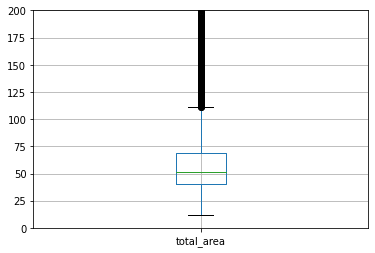

In [23]:
plt.ylim(0, 200)
data.boxplot(column='total_area');

In [24]:
data['total_area'].describe()

count    23252.000000
mean        58.078330
std         26.436568
min         12.000000
25%         40.000000
50%         51.600000
75%         68.600000
max        200.000000
Name: total_area, dtype: float64

**Вывод:** Общая площадь в выборке от 12 до 200 м2, среднее значение 58м2 , а медиана 51 м2

count    23252.000000
mean        33.255944
std         16.160144
min          8.300000
25%         20.000000
50%         30.400000
75%         40.000000
max        164.700000
Name: living_area, dtype: float64

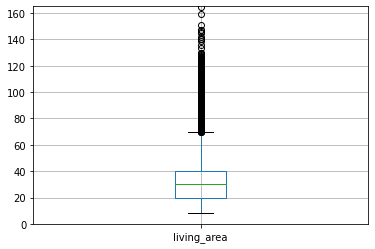

In [25]:
plt.ylim(0, 165)
data.boxplot(column='living_area');
data['living_area'].describe()

**Вывод:** Жилая площадь выборке от 8 до 164 м2, среднее значение 33м2 , медиана 30 м2.

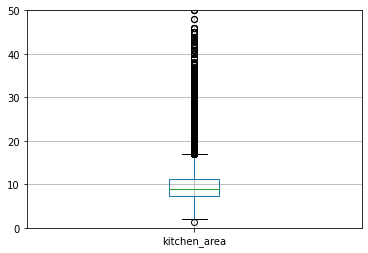

In [26]:
plt.ylim(0, 50)
data.boxplot(column='kitchen_area');
data['kitchen_area'].describe();

**Вывод:** Площадь кухни в выборке от 1.3 до 77 м2, среднее значение 10м2 , а медиана 9 м2.


count    23252.000000
mean         6.001423
std          6.176898
min          0.012190
25%          3.400000
50%          4.600000
75%          6.660000
max        330.000000
Name: last_price, dtype: float64

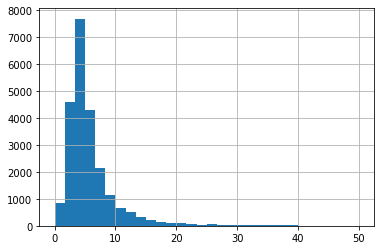

In [27]:
data['last_price'] = (data['last_price']/1000000)
data['last_price'].hist(bins=30,range=(0,50));
data['last_price'].describe()

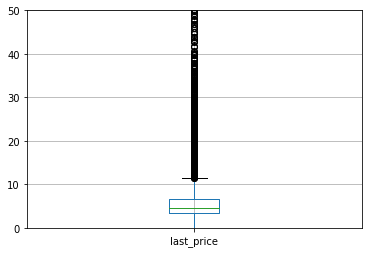

In [28]:
plt.ylim(0,50)
data.boxplot(column='last_price');

In [29]:
price_anomaly = data.query('last_price >= 50 or last_price <= 1').pivot_table(index = 'last_price',
                            values = ['total_area','rooms','is_apartment', 'studio'])
#посчитаем скольо аномальных значений 
price_anomaly.count()

is_apartment    100
rooms           100
studio          100
total_area      100
dtype: int64

In [30]:
price_anomaly.shape[0]/data.shape[0]

0.00430070531567177

100 значени 0.4 процента от выборки  - тоже не очень много - думаю можно и от этих данных избавиться

In [31]:
data['last_price']= data.query('last_price >= 1 and last_price <= 50')['last_price']
data['last_price'].describe()
#data.boxplot(column='last_price');

count    22980.000000
mean         5.897026
std          4.608121
min          1.000000
25%          3.450000
50%          4.600000
75%          6.690000
max         50.000000
Name: last_price, dtype: float64

**Вывод:** Минимальная цена 1млн - максимальная 50 млн. Средняя цена в выборке 5,9 млн , а медиана 4,6 млн.

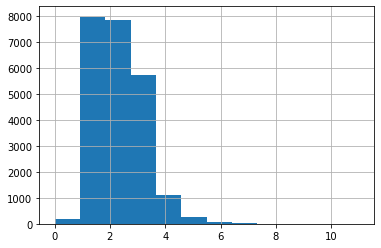

In [32]:
data['rooms'].hist(bins=12);

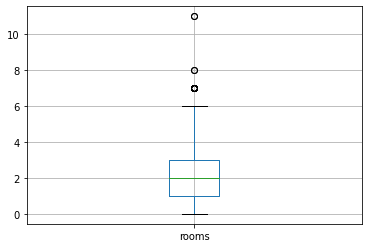

In [33]:
data.boxplot(column='rooms');

In [34]:
data['rooms'].describe()

count    23252.000000
mean         2.033416
std          0.994913
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

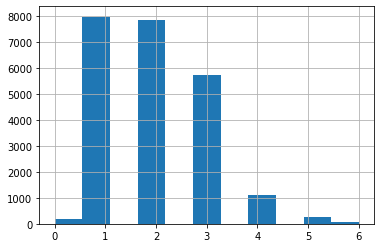

In [35]:
data['rooms'].hist(bins=11, range=(0,6));

**Вывод:** в выборке есть картиры как без комнат так и 11 комнатные. Больше всего 1 комнатных квартир, чуть меньше 2х комнатных. Среднее количество комнат 2. Больше 6 комнат можно считать выбросами

count    23252.000000
mean         2.688478
std          0.192164
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.980000
Name: ceiling_height, dtype: float64

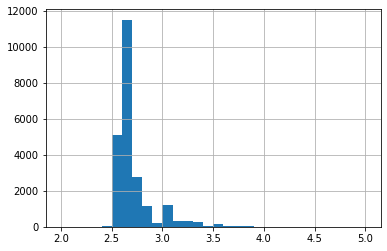

In [36]:
data['ceiling_height'].hist(bins=30,range = (2,5));
data['ceiling_height'].describe()

**Вывод:** Высота потолков среднее значение 2,69м что в принципе нормально. Медианное значение 2,7 м

count    23252.000000
mean         5.893256
std          4.883456
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

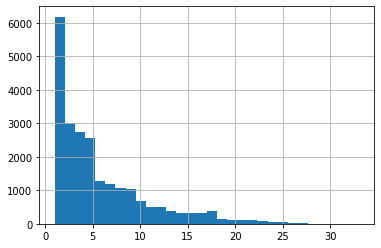

In [37]:
data['floor'].hist(bins=30);
data['floor'].describe()

**Вывод:** Этажи кавртир находятся в диапазоне от 1 до 33 этажа. Большинство объявлний с 1 по 5 этаж скрее всего связано с  массовой спальной застройко в советское время. Среднее значение почти 6, а медианное 4. 

count      23252
unique         3
top       другой
freq       17138
Name: floor_category, dtype: object

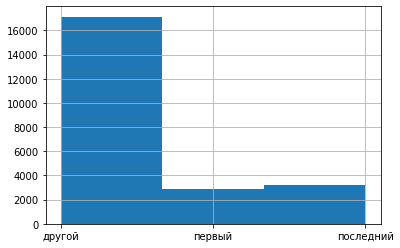

In [38]:
data['floor_category'].hist(bins=3);
data['floor_category'].describe()

**Вывод:** в выборке большинстов квартир расположено не на первом и не на поледнем этажах

count    23252.000000
mean        10.731679
std          6.602624
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

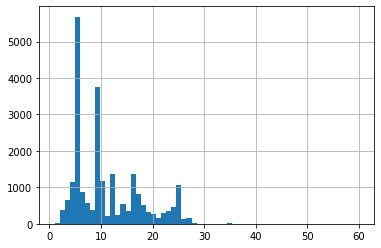

In [39]:
data['floors_total'].hist(bins=60);
data['floors_total'].describe()

**Вывод:** В выборке есть дома как 1 этажные так и 60 этажные. Большинство домов представленных в выборке имеют этажность 5 этажей, далее 9 этажные дома. Из личных наблюдений: типичная советская массовая застройка спальных районов как раз состояла из домов 5 и 9 этажей

count    17773.000000
mean     14304.842401
std       8588.752134
min        181.000000
25%       9467.000000
50%      13166.000000
75%      16319.000000
max      65968.000000
Name: citycenters_nearest, dtype: float64

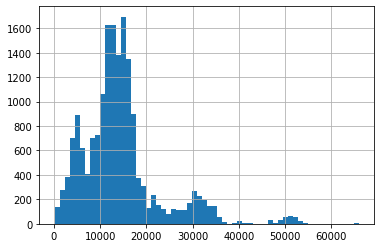

In [40]:
data['citycenters_nearest'].hist(bins=60);
data['citycenters_nearest'].describe()

**Вывод:** Расстояния до цента в диапазоне от 181м до почти 66 тыс м. Большинство квартир расположено в диапазоне от 10км до 20км до центар. Среднее расстояние до центра 14 км.

count    17753.000000
mean     28834.935448
std      12688.797379
min          0.000000
25%      18490.000000
50%      26880.000000
75%      37368.000000
max      84869.000000
Name: airports_nearest, dtype: float64

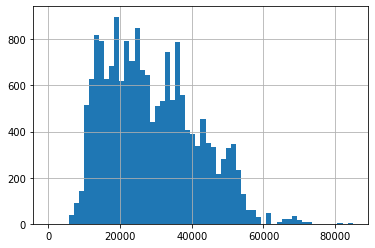

In [41]:
data['airports_nearest'].hist(bins=60);
data['airports_nearest'].describe()

**Вывод:** Расстояния до аэропорта в диапазоне от 0м до почти 85км. Большинство квартир расположено на расстоянии от 10 до 50 км. Среднее расстояние до аэропорта 28 км.

count    7836.000000
mean      491.724604
std       342.835007
min         1.000000
25%       288.000000
50%       455.500000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

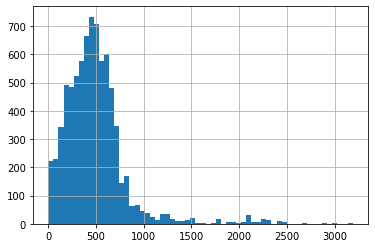

In [42]:
data['parks_nearest'].hist(bins=60);
data['parks_nearest'].describe()

**Вывод:** Расстояния до парка указано в 8030 объявлениях. Диапазон от 1м до 3км. Большинство квартир расположено на расстоянии до 800м от парка. Среднее расстояние до парка 491м.

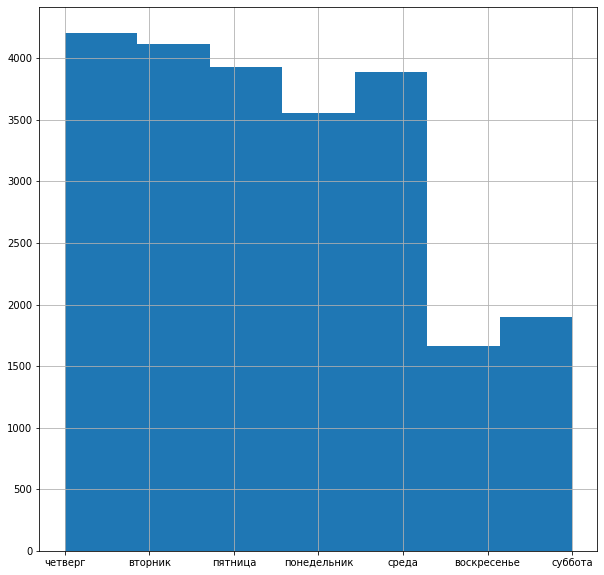

In [43]:
data['week_day_exposition'].hist(bins=7,figsize=(10, 10));

**Вывод:** Меньше всего объявления подавали в субботу и воскресень

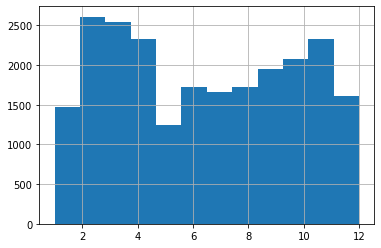

In [44]:
data['month_exposition'].hist(bins=12,range=(1,12));

**Вывод:** Меньше всего объявления подавали  в декабре январе и мае - это скорее всего связано с продолжительными праздничными каникулами

#### 

count    20156.000000
mean       179.408662
std        218.264842
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

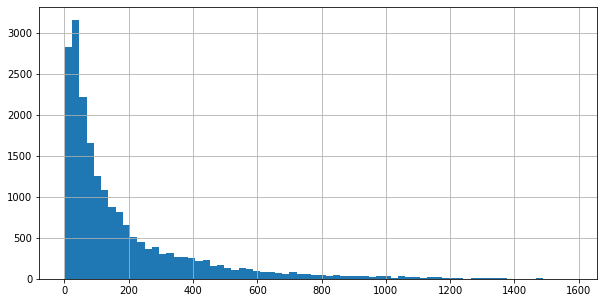

In [45]:
data['days_exposition'].hist(bins=70, figsize=(10,5));
data['days_exposition'].describe()

Средний срок размещения объявления 180 дней, медиана 95 дня. Максимальное 1580 дней это больше 4 лет

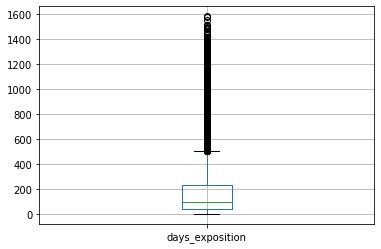

In [46]:
data.boxplot(column='days_exposition');

**Вывод** Большая часть обявлений закрывается в течении 200 дней. Быстрые продажи в течении 1 дня. Все что больше 500 дней будем считать необычно долгими продажами.

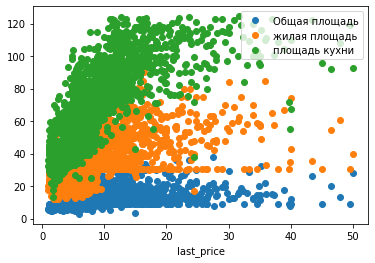

In [47]:
#удалим выбросы из данны 
filtered = data.query('total_area < 125' or 'living_area < 75' or 'kitchen_area < 19' or 'last_price < 17' )

price_to_area = filtered.pivot_table(index='last_price', values=['total_area','living_area','kitchen_area'],aggfunc = ['median'])
price_to_area.columns = ['Общая площадь', 'жилая площадь','площадь кухни']
price_to_area.plot(style='o');

In [48]:
filtered[['total_area','living_area','kitchen_area','last_price']].corr()

,total_area,living_area,kitchen_area,last_price
total_area,1.000000,0.849359,0.474426,0.706924
living_area,0.849359,1.000000,0.265318,0.534505
kitchen_area,0.474426,0.265318,1.000000,0.490345
last_price,0.706924,0.534505,0.490345,1.000000


Посчитав коэффициент пирсона можно увидеть что цена и общая площадь зависят друг от друга больше чем  цена от жилой площади и площади кухни

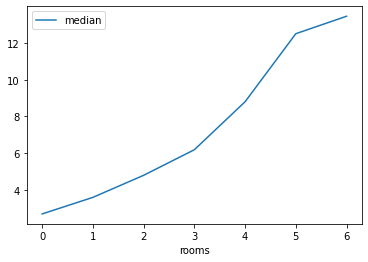

In [49]:
price_to_rooms = data.pivot_table(index='rooms', values='last_price',aggfunc = ['mean','count', 'median'])
price_to_rooms.columns = ['mean','count', 'median']
price_to_rooms.query('count > 50').sort_values('median', ascending = False)
price_to_rooms.query('count > 50').plot(y = 'median');

In [50]:
price_to_rooms

,mean,count,median
rooms,,,
0,2.977413,191,2.700
1,3.865128,7883,3.600
2,5.564356,7771,4.800
3,7.720735,5681,6.190
4,11.033637,1112,8.800
5,14.387583,259,12.500
6,15.522844,59,13.450
7,18.682000,20,16.750
8,19.145000,2,19.145


Зависимость количества комнат и цены почти линейная. цена 1комнатной квартиры в среднем 3.8 млн, 2х комнатной 4,8 млн 

,mean,count,median
floor_category,,,
другой,6.140009,17023,4.80
первый,4.673124,2806,3.95
последний,5.674233,3151,4.30


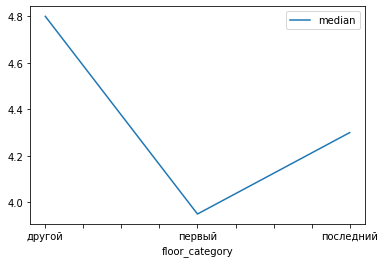

In [51]:
pivot_table_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean','count','median'])
pivot_table_floor_category.columns = ['mean','count','median']
pivot_table_floor_category.plot(y = 'median');
pivot_table_floor_category

Можно сделать вывод что квартиры на первом этаже дешевле чем на последнем, а они в свою очередь дешевле квартир расположенных в середине дома


,mean,count,median
week_day_exposition,,,
вторник,5.930706,4078,4.7000
среда,5.955626,3840,4.7000
понедельник,5.963437,3523,4.6500
четверг,6.019409,4156,4.6000
суббота,5.731505,1854,4.5675
пятница,5.759791,3886,4.5500
воскресенье,5.735869,1643,4.5300


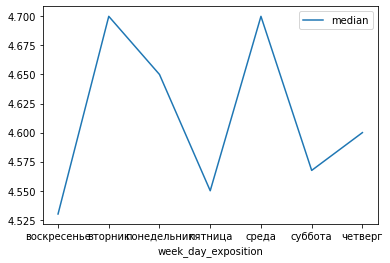

In [52]:
pivot_table_weekday_exposition = data.pivot_table(index = 'week_day_exposition', values = 'last_price', aggfunc = ['mean','count','median'])
pivot_table_weekday_exposition.columns = ['mean','count','median']

pivot_table_weekday_exposition.plot(y = 'median');
pivot_table_weekday_exposition.sort_values('median', ascending = False)

,mean,count,median
month_exposition,,,
4,5.901638,2304,4.8000
9,5.956183,1920,4.6945
11,6.019229,2306,4.6800
2,6.024276,2575,4.6500
3,5.778733,2510,4.6500
12,5.910755,1589,4.6500
1,5.986119,1447,4.6000
7,5.859023,1637,4.6000
8,5.917427,1704,4.5500


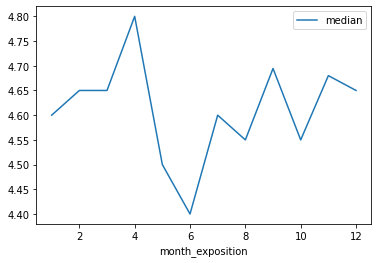

In [53]:
pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median');

pivot_table_month_exposition.sort_values('median', ascending = False)

Май и июнь самая низкая стоимость квартир это скорее всего связано с сезоном отпусков 

,mean,count,median
year_exposition,,,
2014,10.498943,132,7.500
2015,6.801124,1115,5.200
2019,6.228523,2803,5.047
2018,5.671780,8284,4.590
2016,5.982653,2671,4.500
2017,5.783236,7975,4.500


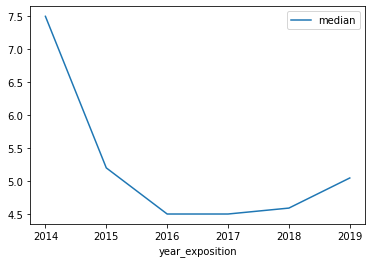

In [54]:
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median');

pivot_table_year_exposition.sort_values('median', ascending = False)

Видно падение стоимости квартир с 2014 года до 2017, далее началься рост

In [55]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'm2_price', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
#самая высокая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]

,count,mean
locality_name,,
санкт-петербург,15376,113364.6702


самая высокая цена м2 в санкт-петербург 113364р 

In [56]:
#самая низкая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
выборг,233,58250.240343


самая низкая цена м2 Выборг 58250р 

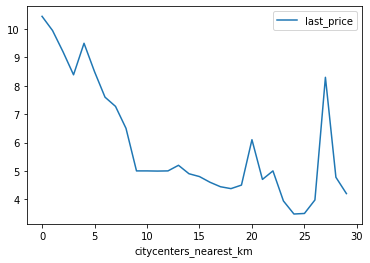

In [57]:
pivot_table_km = data.query('locality_name == "санкт-петербург" and citycenters_nearest_km !=999999'
                           ).pivot_table(index = 'citycenters_nearest_km',
                            values = 'last_price', aggfunc = ['mean','median'])

pivot_table_km.plot(y = 'median');

In [58]:
pivot_table_km

,mean,median
,last_price,last_price
citycenters_nearest_km,,
0,15.210342,10.450000
1,11.883711,9.950000
2,10.866755,9.200000
3,10.286842,8.389000
4,11.525196,9.500000
5,11.169287,8.500000
6,11.086711,7.600000
7,9.451509,7.275000


Стоимость уменьшается от ценра 0 км к окраинам. В раойне 25-30 км есть вспелск по ценам возможно там рассположены какие-то "клубные дома" в которых стоимость квартир досточно высока. Судя по графику самый центр города располжен на расстоянии 5 км. От 10 до 25 км идет достаточно плавное сниженеи цены

### Общий вывод

На стоимость квартиры в большей степени влияет общая площадь, чем жилая или площадь кухни. Чем больше площадь, тем цена выше.
Так же обнаружена почти прямолинейная зависимость цены квартиры от количества комнат, чем больше комнат, тем дороже квартира
Квартиры на первом этаже дешевле чем на последнем, а они в свою очередь дешевле квартир расположенных в середине дома
Цена квартир, выставленных во вторник и среду выше цены квартир в остальные дни недели. Квартиры выстваленные в пятницу и воскресенье имеют цену ниже.
Есть влияние месяца на цену, в мае и июне цены на квартиры ниже чем в остальное месяцы года. Самые высокие цены у квартир выставленных в апреле и сентябре.
Цены на квартиры в 2014 году были самыми высокими далее произошел спад, которы продолжался до 2017 года, далее начался подьем в стоимостях квартир.
Самая высокая цена м2 из данной выбрки в Санкт-Петербурге 113364руб. за м2, самая низкая в Выборге 58250 руб за М2
На цену квартиры влияет расстояни от центра города. Самые дорогие картиры расположены в 5 км от центра

Средняя продающаяся квартира имеет параметры: общая площадь 60м2, жилая площадь 34м2, площадь кухни 10м2, стоимостью 6 млн, 2 комнаты, высота потолков 2,69 м, расположенная на 5 этаже 10 этажного дома, расстояние от центра 14 км  Санкт-Петербурга и 28 км от аэропорта, с парком в 500 метрах. Объявление должно быть подано в рабочий день с февраля по апрель или с сентября по ноябрь